# Niveles PM 2.5 Beijing

### Proyecto de Modelación y simulación IV

### 26 de mayo de 2024

### Autores
Juan Camilo Bermudez Colorado  
Efraín Jurado Torres  
Luis Alejandro Baena Marin  

-------

# Entendimiento del negocio

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

# Carga del dataset
data_raw = pd.read_csv('BeijingPM.csv')

In [71]:
data_raw.shape

(52584, 18)

In [72]:
# Mostrando las primeras filas del dataset
data_raw.head(10)

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0
5,6,2010,1,1,5,4,NaN,NaN,NaN,NaN,-19.0,47.0,1017.0,-10.0,NW,16.10,0.0,0.0
6,7,2010,1,1,6,4,NaN,NaN,NaN,NaN,-19.0,44.0,1017.0,-9.0,NW,19.23,0.0,0.0
7,8,2010,1,1,7,4,NaN,NaN,NaN,NaN,-19.0,44.0,1017.0,-9.0,NW,21.02,0.0,0.0
8,9,2010,1,1,8,4,NaN,NaN,NaN,NaN,-19.0,44.0,1017.0,-9.0,NW,24.15,0.0,0.0
9,10,2010,1,1,9,4,NaN,NaN,NaN,NaN,-20.0,37.0,1017.0,-8.0,NW,27.28,0.0,0.0


In [73]:
# Información sobre los tipos de datos y los valores faltantes
print("\nInformación del dataset:")
data_raw.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No               52584 non-null  int64  
 1   year             52584 non-null  int64  
 2   month            52584 non-null  int64  
 3   day              52584 non-null  int64  
 4   hour             52584 non-null  int64  
 5   season           52584 non-null  int64  
 6   PM_Dongsi        25052 non-null  float64
 7   PM_Dongsihuan    20508 non-null  float64
 8   PM_Nongzhanguan  24931 non-null  float64
 9   PM_US Post       50387 non-null  float64
 10  DEWP             52579 non-null  float64
 11  HUMI             52245 non-null  float64
 12  PRES             52245 non-null  float64
 13  TEMP             52579 non-null  float64
 14  cbwd             52579 non-null  object 
 15  Iws              52579 non-null  float64
 16  precipitation    52100 non-null 

In [74]:
# Descripción estadística de los datos
print("\nEstadísticas descriptivas:")
data_raw.describe(include = 'int64')


Estadísticas descriptivas:


,No,year,month,day,hour,season
count,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000
mean,26292.500000,2012.499772,6.523962,15.726609,11.500000,2.491100
std,15179.837614,1.707485,3.448452,8.798896,6.922252,1.116988
min,1.000000,2010.000000,1.000000,1.000000,0.000000,1.000000
25%,13146.750000,2011.000000,4.000000,8.000000,5.750000,1.000000
50%,26292.500000,2012.000000,7.000000,16.000000,11.500000,2.000000
75%,39438.250000,2014.000000,10.000000,23.000000,17.250000,3.000000
max,52584.000000,2015.000000,12.000000,31.000000,23.000000,4.000000


In [75]:
"""
with pd.ExcelWriter("describes.xlsx", mode='a') as writer:  
    data_raw.describe(include = 'int64').to_excel(writer, sheet_name='int64')
    data_raw.describe(include = 'float64').to_excel(writer, sheet_name='float64')
    data_raw.describe(include = object).to_excel(writer, sheet_name='object')
    #data_raw.info().to_excel("describes.xlsx", sheet_name='info')
    data_raw.head().to_excel(writer, sheet_name='head')
    
"""

'\nwith pd.ExcelWriter("describes.xlsx", mode=\'a\') as writer:  \n    data_raw.describe(include = \'int64\').to_excel(writer, sheet_name=\'int64\')\n    data_raw.describe(include = \'float64\').to_excel(writer, sheet_name=\'float64\')\n    data_raw.describe(include = object).to_excel(writer, sheet_name=\'object\')\n    #data_raw.info().to_excel("describes.xlsx", sheet_name=\'info\')\n    data_raw.head().to_excel(writer, sheet_name=\'head\')\n    \n'

In [76]:
# Descripción estadística de los datos
print("\nEstadísticas descriptivas:")
data_raw.describe(include = 'float64')


Estadísticas descriptivas:


,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
count,25052.000000,20508.000000,24931.000000,50387.000000,52579.000000,52245.000000,52245.000000,52579.000000,52579.000000,52100.000000,52100.000000
mean,89.154439,92.560806,88.643737,95.904241,2.074554,54.602421,1016.465442,12.587040,23.261829,19.258683,19.519008
std,87.239267,88.027434,88.041166,91.643772,14.222059,25.991338,10.295070,12.098527,49.281706,4381.035532,4381.036040
min,3.000000,3.000000,3.000000,1.000000,-40.000000,2.000000,991.000000,-19.000000,0.450000,0.000000,0.000000
25%,24.000000,28.000000,24.000000,27.000000,-10.000000,31.000000,1008.000000,2.000000,1.790000,0.000000,0.000000
50%,64.000000,68.000000,62.000000,69.000000,2.000000,55.000000,1016.000000,14.000000,4.920000,0.000000,0.000000
75%,124.000000,127.000000,122.000000,132.000000,15.000000,78.000000,1025.000000,23.000000,21.020000,0.000000,0.000000
max,737.000000,672.000000,844.000000,994.000000,28.000000,100.000000,1046.000000,42.000000,585.600000,999990.000000,999990.000000


In [77]:
# Descripción estadística de los datos
print("\nEstadísticas descriptivas:")
data_raw.describe(include = object)


Estadísticas descriptivas:


,cbwd
count,52579
unique,4
top,SE
freq,18272


C:\Users\eageo\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eageo\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eageo\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eageo\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

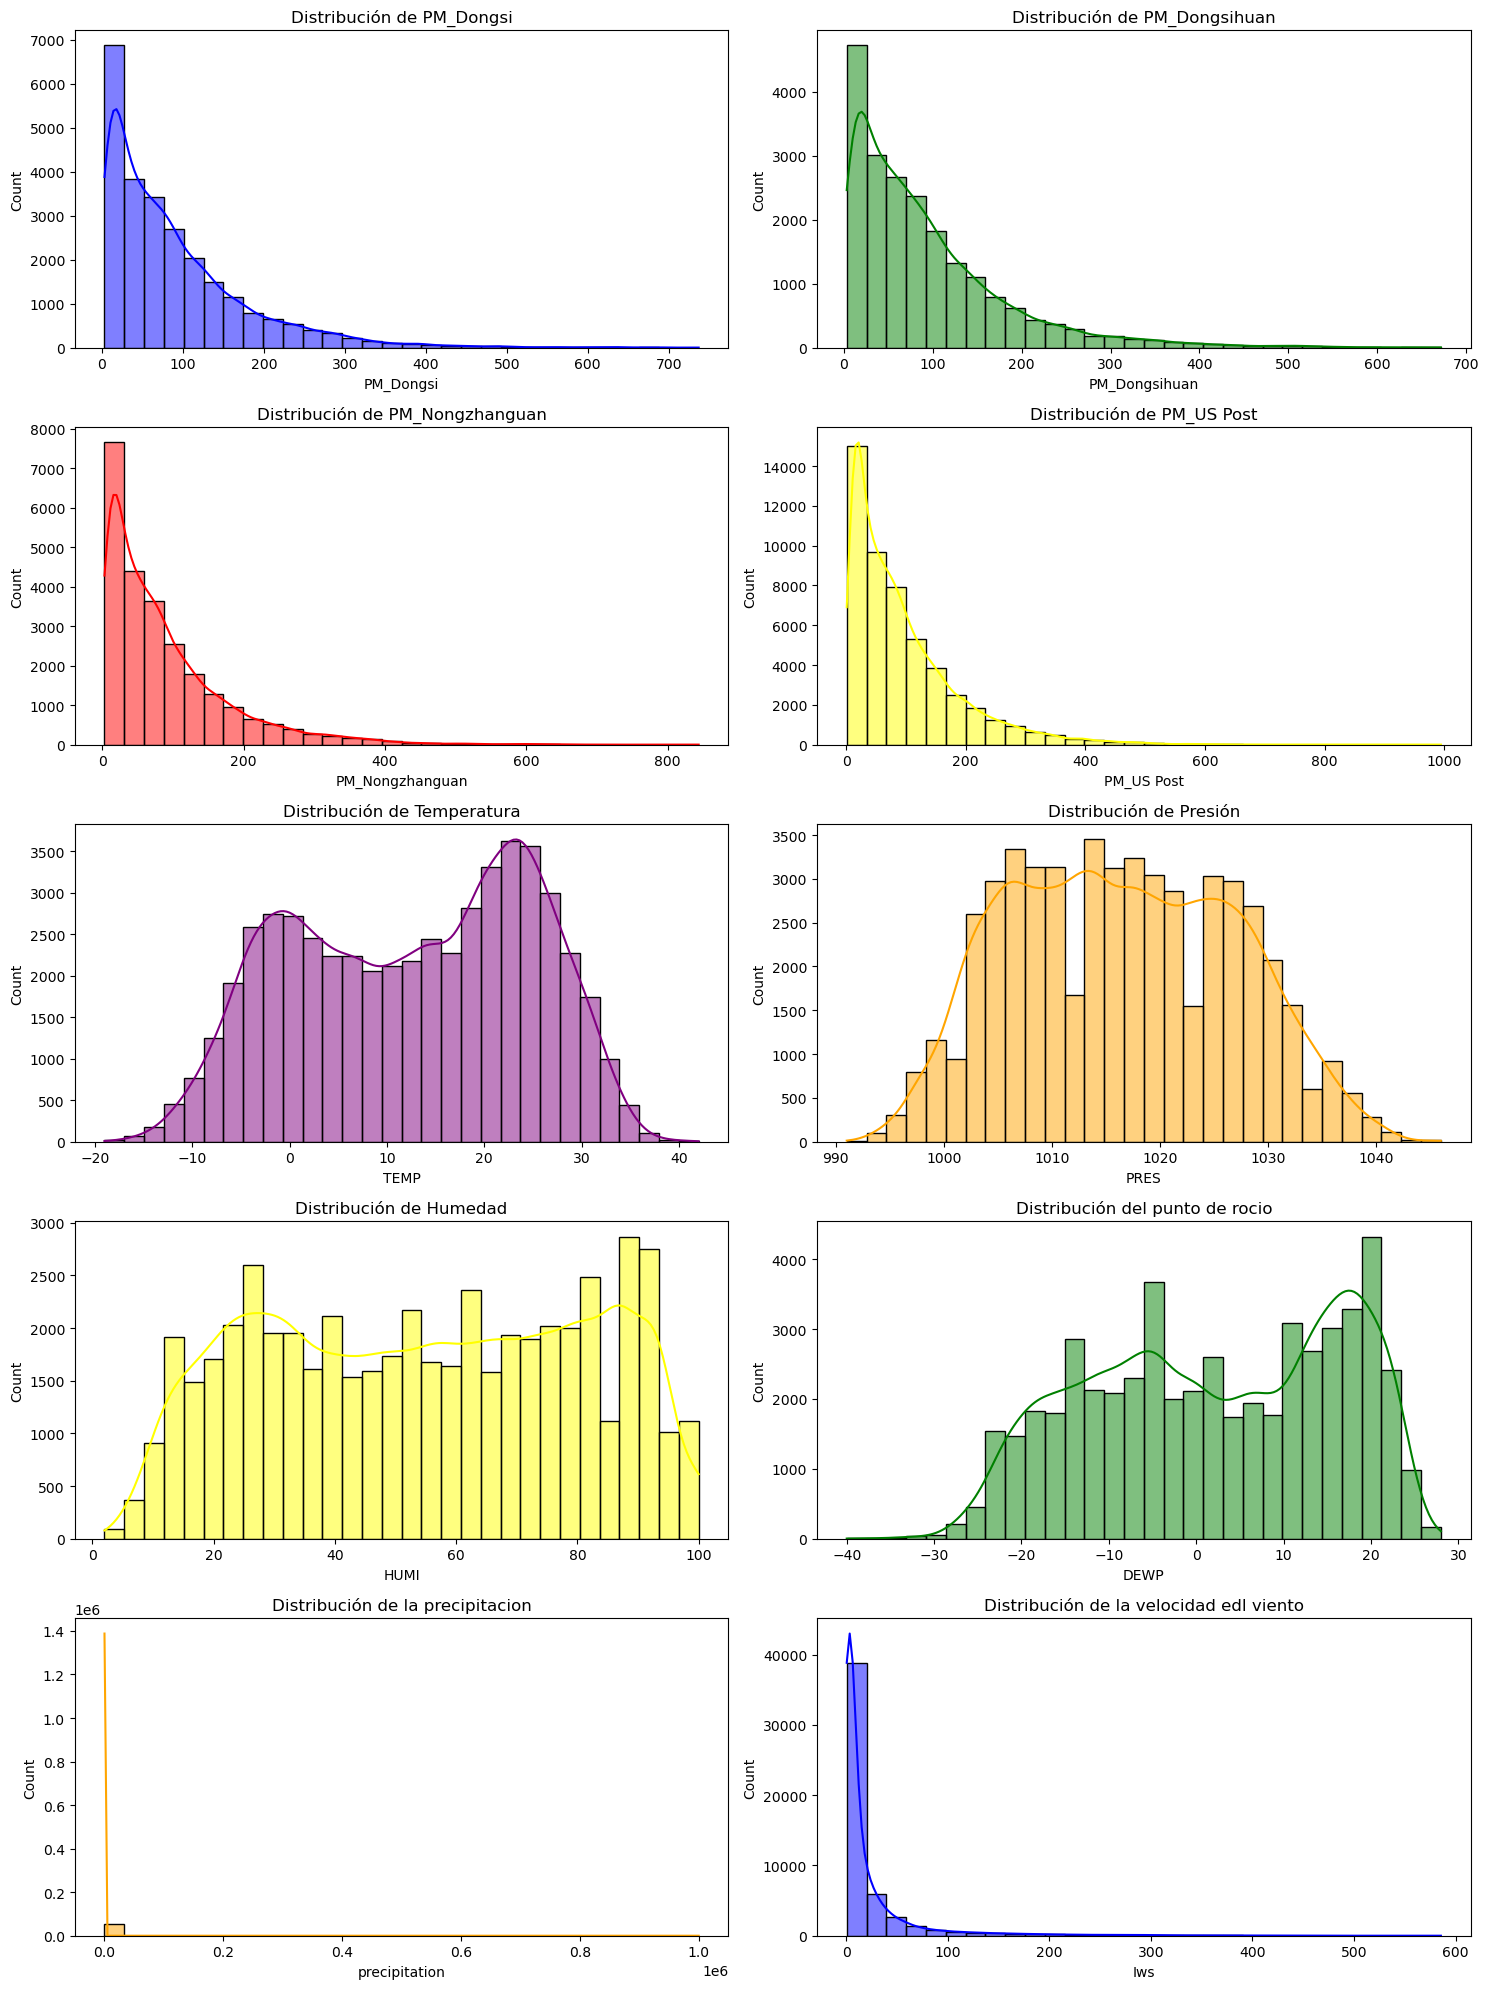

In [78]:
# Gráficos para visualizar la distribución de las variables numéricas más importantes
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
sns.histplot(data=data_raw, x="PM_Dongsi", bins=30, ax=axes[0, 0], color="blue", kde=True).set_title('Distribución de PM_Dongsi')
sns.histplot(data=data_raw, x="PM_Dongsihuan", bins=30, ax=axes[0, 1], color="green", kde=True).set_title('Distribución de PM_Dongsihuan')
sns.histplot(data=data_raw, x="PM_Nongzhanguan", bins=30, ax=axes[1, 0], color="red", kde=True).set_title('Distribución de PM_Nongzhanguan')
sns.histplot(data=data_raw, x="PM_US Post", bins=30, ax=axes[1, 1], color="yellow", kde=True).set_title('Distribución de PM_US Post')
sns.histplot(data=data_raw, x="TEMP", bins=30, ax=axes[2, 0], color="purple", kde=True).set_title('Distribución de Temperatura')
sns.histplot(data=data_raw, x="PRES", bins=30, ax=axes[2, 1], color="orange", kde=True).set_title('Distribución de Presión')
sns.histplot(data=data_raw, x="HUMI", bins=30, ax=axes[3, 0], color="yellow", kde=True).set_title('Distribución de Humedad')
sns.histplot(data=data_raw, x="DEWP", bins=30, ax=axes[3, 1], color="green", kde=True).set_title('Distribución del punto de rocio')
sns.histplot(data=data_raw, x="precipitation", bins=30, ax=axes[4, 0], color="orange", kde=True).set_title('Distribución de la precipitacion')
sns.histplot(data=data_raw, x="Iws", bins=30, ax=axes[4, 1], color="blue", kde=True).set_title('Distribución de la velocidad edl viento')

plt.tight_layout()
plt.show()

### Viendo la evolución del PM

Primero graficamos los datos de las distintas estaciones

In [79]:
#Se hace esto para poder sacar los promedios por día y por mes
year = data_raw['year']
month = data_raw['month']
day = data_raw['day']
hour = data_raw['hour']
df = pd.DataFrame({'year': year,
                   'month': month,
                   'day': day,
                   'hour': hour})
df['time'] = pd.to_datetime(df)
df['PM_Dongsi'] = data_raw['PM_Dongsi']
df['PM_Dongsihuan'] = data_raw['PM_Dongsihuan']
df['PM_Nongzhanguan'] = data_raw['PM_Nongzhanguan']
df['PM_US Post'] = data_raw['PM_US Post']

In [80]:
df.set_index('time', inplace=True)
# Resamplear por mes y calcular el promedio
monthly_avg_Dongsi = df['PM_Dongsi'].resample('ME').mean()
monthly_avg_Dongsihuan = df['PM_Dongsihuan'].resample('ME').mean()
monthly_avg_Nongzhanguan = df['PM_Nongzhanguan'].resample('ME').mean()
monthly_avg_US = df['PM_US Post'].resample('ME').mean()


# Convertir la Serie resultante de nuevo a un DataFrame
monthly_avg_Dongsi = monthly_avg_Dongsi.reset_index()
monthly_avg_Dongsihuan = monthly_avg_Dongsihuan.reset_index()
monthly_avg_Nongzhanguan = monthly_avg_Nongzhanguan.reset_index()
monthly_avg_US = monthly_avg_US.reset_index()

In [81]:
df.head()

,year,month,day,hour,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post
time,,,,,,,,
2010-01-01 00:00:00,2010,1,1,0,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,2010,1,1,1,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,2010,1,1,2,NaN,NaN,NaN,NaN
2010-01-01 03:00:00,2010,1,1,3,NaN,NaN,NaN,NaN
2010-01-01 04:00:00,2010,1,1,4,NaN,NaN,NaN,NaN


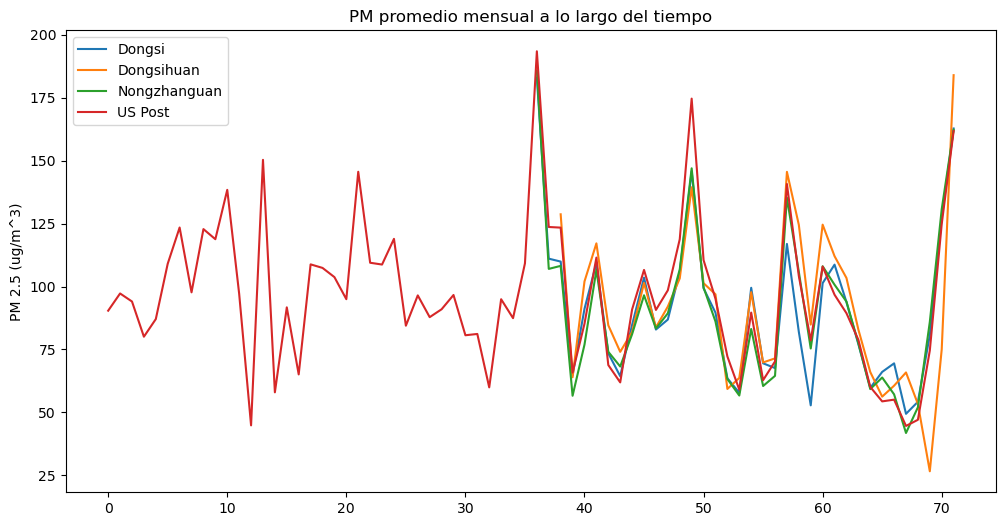

In [82]:
plt.figure(figsize=(12, 6)) 
plt.plot(monthly_avg_Dongsi.index, monthly_avg_Dongsi['PM_Dongsi'])
plt.plot(monthly_avg_Dongsihuan.index, monthly_avg_Dongsihuan['PM_Dongsihuan'])
plt.plot(monthly_avg_Nongzhanguan.index, monthly_avg_Nongzhanguan['PM_Nongzhanguan'])
plt.plot(monthly_avg_US.index, monthly_avg_US['PM_US Post'])
# Añadir etiquetas y título
plt.ylabel('PM 2.5 (ug/m^3)')
plt.title('PM promedio mensual a lo largo del tiempo')
plt.legend(['Dongsi', 'Dongsihuan','Nongzhanguan','US Post'])
plt.show()

Se volvera a realizar este tipo de grafica pero con PM_total, descrito más adelante

# Tratamiento de los datos
------
Vamos a crear 'data' la cual contendra los datos arreglados. 

In [83]:
data = data_raw.copy()

### Duplicidad

In [84]:
duplicates = data_raw.drop(columns=['No']).duplicated().sum()
print("Número de registros duplicados:")
print(duplicates)

Número de registros duplicados:
0


### Completitud

<Axes: >

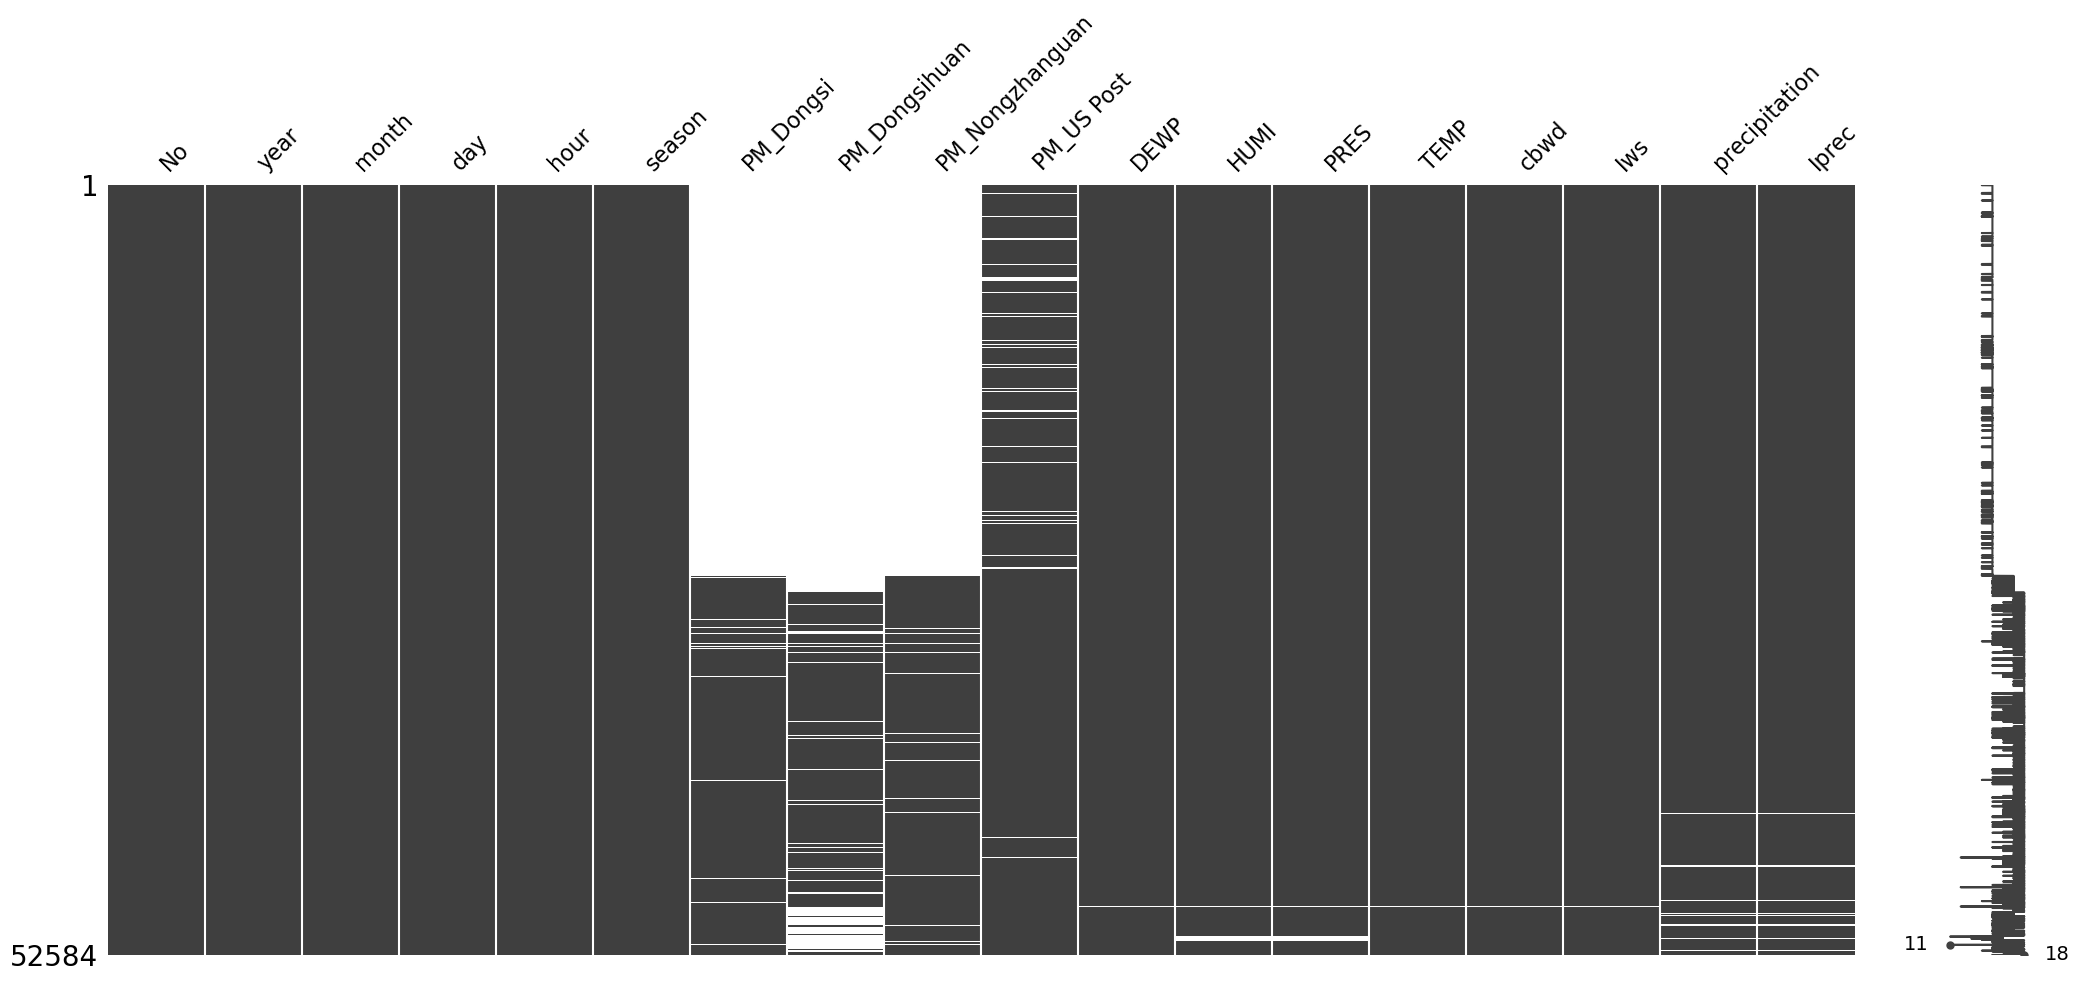

In [85]:
import missingno as msno
msno.matrix(data_raw)

In [86]:
missing_values = data_raw.isnull().sum()
missing_percentage = (missing_values / len(data_raw)) * 100

# Mostrar los resultados
print("Valores Faltantes por Columna:")
print(missing_values)

Valores Faltantes por Columna:
No                     0
year                   0
month                  0
day                    0
hour                   0
season                 0
PM_Dongsi          27532
PM_Dongsihuan      32076
PM_Nongzhanguan    27653
PM_US Post          2197
DEWP                   5
HUMI                 339
PRES                 339
TEMP                   5
cbwd                   5
Iws                    5
precipitation        484
Iprec                484
dtype: int64


In [87]:
print("\nPorcentaje de Valores Faltantes por Columna:")
print(missing_percentage)


Porcentaje de Valores Faltantes por Columna:
No                  0.000000
year                0.000000
month               0.000000
day                 0.000000
hour                0.000000
season              0.000000
PM_Dongsi          52.358132
PM_Dongsihuan      60.999544
PM_Nongzhanguan    52.588240
PM_US Post          4.178077
DEWP                0.009509
HUMI                0.644683
PRES                0.644683
TEMP                0.009509
cbwd                0.009509
Iws                 0.009509
precipitation       0.920432
Iprec               0.920432
dtype: float64


### Solucion de datos faltantes
#### PM

In [88]:
# Creo PM el cual va a ser la media
data['PM_total'] = data[['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan','PM_US Post']].mean(axis=1)
data

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,PM_total
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0,NaN
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0,NaN
2,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0,NaN
3,4,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0,NaN
4,5,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,52580,2015,12,31,19,4,140.0,157.0,122.0,133.0,-8.0,68.0,1031.0,-3.0,SE,7.14,0.0,0.0,138.00
52580,52581,2015,12,31,20,4,157.0,199.0,149.0,169.0,-8.0,63.0,1030.0,-2.0,SE,8.03,0.0,0.0,168.50
52581,52582,2015,12,31,21,4,171.0,231.0,196.0,203.0,-10.0,73.0,1030.0,-6.0,NE,0.89,0.0,0.0,200.25
52582,52583,2015,12,31,22,4,204.0,242.0,221.0,212.0,-10.0,73.0,1030.0,-6.0,NE,1.78,0.0,0.0,219.75


In [89]:
# Solo debemos enfrentarnos a 1894 Nans
data['PM_total'].isnull().sum()

1894

In [90]:
# Interpolamos linelmente, y solo tenemos 23 NaN
data['PM_total'] = data['PM_total'].interpolate(method='linear')
data['PM_total'].isnull().sum()

23

In [91]:
# Eliminamos los otros PM ya que no los necesitamos
data = data.drop(columns=['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post'])

#### Demas columnas

In [92]:
missing_values = data.isnull().sum()
print("Valores Faltantes por Columna:")
print(missing_values)

Valores Faltantes por Columna:
No                 0
year               0
month              0
day                0
hour               0
season             0
DEWP               5
HUMI             339
PRES             339
TEMP               5
cbwd               5
Iws                5
precipitation    484
Iprec            484
PM_total          23
dtype: int64


In [93]:
data.dropna(inplace=True)

In [94]:
# Perdimos esta cantidad de filas
diferencia = data_raw.shape[0] - data.shape[0]
print(f"Se perdieron {diferencia} filas")
print(f"Lo que es un {100 / data_raw.shape[0] * diferencia}% de los datos")

Se perdieron 842 filas
Lo que es un 1.6012475277650995% de los datos


### Precision

In [95]:
# Vimos un dato raro en precipitacion y iprec
# No necesitamos arreglarlo de 'data' ya que esa fila fue eliminada
data_raw[data_raw['precipitation'] > 100]

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
51277,51278,2015,11,7,13,3,16.0,NaN,15.0,16.0,-1.0,NaN,NaN,4.0,NE,4.92,999990.0,999990.0


### Consistencia

In [96]:
# Algun 'id' duplicado?
data_raw["No"].duplicated().sum()

0

In [97]:
# Algo raro en la direccion del viento?
data_raw["cbwd"].unique()

array(['NW', 'cv', 'NE', 'SE', nan], dtype=object)

In [98]:
# Lo unico es que cv deberia ser SW
data.loc[data['cbwd'] == 'cv', 'cbwd'] = 'SW'

In [99]:
# Algo raro en las estaciones?
data_raw['season'].unique()

array([4, 1, 2, 3], dtype=int64)

In [100]:
# Junio en invierno por ejemplo?
data_raw.groupby('season')['month'].unique()

season
1      [3, 4, 5]
2      [6, 7, 8]
3    [9, 10, 11]
4     [1, 2, 12]
Name: month, dtype: object

In [101]:
# más o menos de 24 horas al día?
data_raw[(data_raw["hour"] >= 24) | (data_raw["hour"] < 0)].shape[0]

0

### Conformidad ? que va aca?

### Integridad???

#### Se vueve a graficar la contaminacion pero con PM_total

In [102]:
#Se hace esto para poder sacar los promedios por día y por mes
year = data['year']
month = data['month']
day = data['day']
hour = data['hour']
df = pd.DataFrame({'year': year,
                   'month': month,
                   'day': day,
                   'hour': hour})
df['time'] = pd.to_datetime(df)
df['PM_total'] = data['PM_total']

In [103]:
df.set_index('time', inplace=True)

# Resamplear por día y calcular el promedio
daily_avg = df['PM_total'].resample('D').mean()
# Convertir la Serie resultante de nuevo a un DataFrame
daily_avg_df = daily_avg.reset_index()

# Resamplear por mes y calcular el promedio
monthly_avg = df['PM_total'].resample('ME').mean()
# Convertir la Serie resultante de nuevo a un DataFrame
monthly_avg_df = monthly_avg.reset_index()

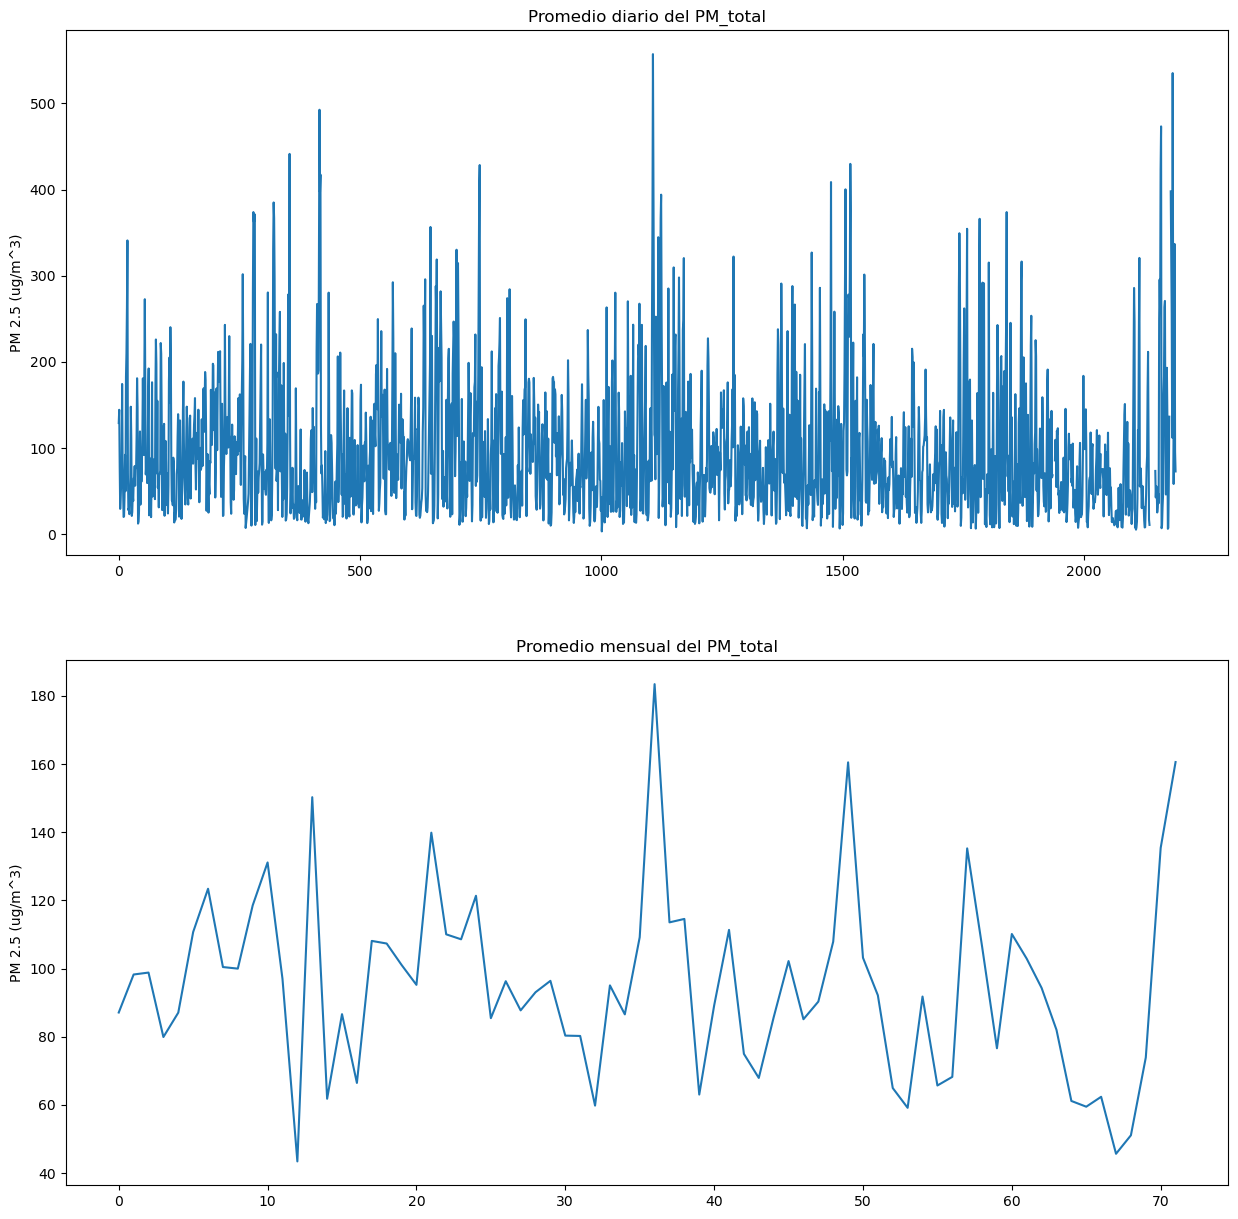

In [104]:
fig, axs = plt.subplots(2, 1, figsize=(15, 15))
axs[0].plot(daily_avg_df.index, daily_avg_df['PM_total'])
axs[0].set_title('Promedio diario del PM_total')
axs[0].set_ylabel('PM 2.5 (ug/m^3)')
axs[1].plot(monthly_avg_df.index, monthly_avg_df['PM_total'])
axs[1].set_title('Promedio mensual del PM_total')
axs[1].set_ylabel('PM 2.5 (ug/m^3)')
plt.show()

# Outliers

<Axes: >

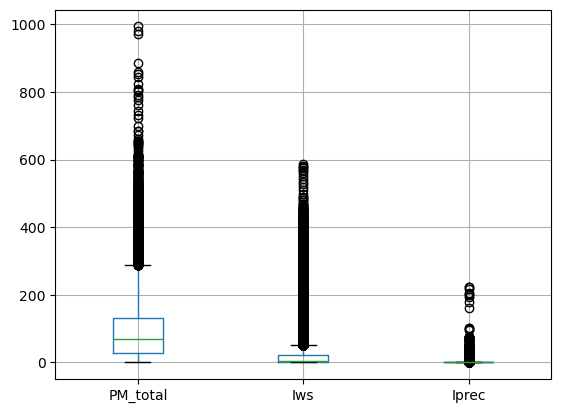

In [105]:
data.boxplot(["PM_total","Iws", "Iprec"])

<Axes: >

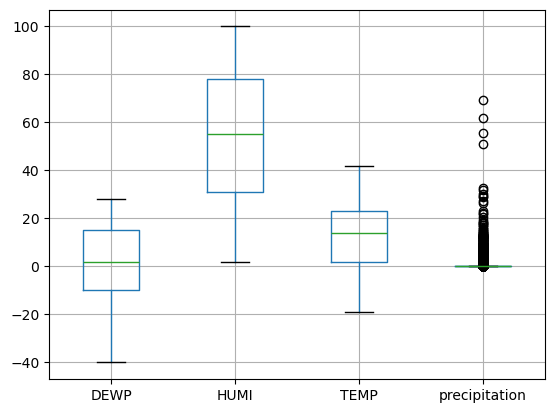

In [106]:
data.boxplot(["DEWP", "HUMI", "TEMP", "precipitation"])

<Axes: >

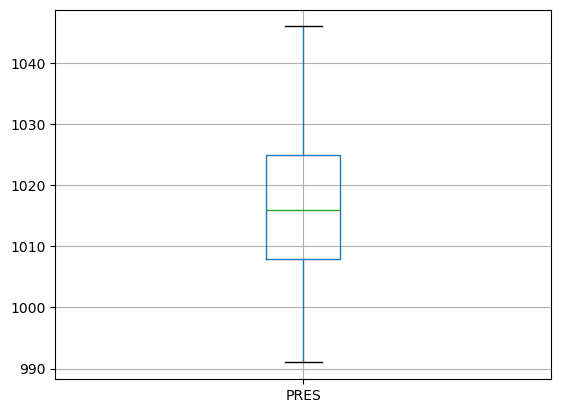

In [107]:
data.boxplot(["PRES"])

 ## Onehot encoding

In [108]:
cbwd = pd.get_dummies(data["cbwd"])
cbwd = cbwd.astype(int)
data= data.join(cbwd)
data.head()

,No,year,month,day,hour,season,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,PM_total,NE,NW,SE,SW
23,24,2010,1,1,23,4,-17.0,41.0,1020.0,-5.0,SW,0.89,0.0,0.0,129.0,0,0,0,1
24,25,2010,1,2,0,4,-16.0,38.0,1020.0,-4.0,SE,1.79,0.0,0.0,148.0,0,0,1,0
25,26,2010,1,2,1,4,-15.0,42.0,1020.0,-4.0,SE,2.68,0.0,0.0,159.0,0,0,1,0
26,27,2010,1,2,2,4,-11.0,63.5,1021.0,-5.0,SE,3.57,0.0,0.0,181.0,0,0,1,0
27,28,2010,1,2,3,4,-7.0,85.0,1022.0,-5.0,SE,5.36,0.0,0.0,138.0,0,0,1,0


In [109]:
data.drop(columns = ['cbwd'], inplace = True)

In [110]:
data.loc[data['season'] == 1, 'season'] = 'Primavera'
data.loc[data['season'] == 2, 'season'] = 'Verano'
data.loc[data['season'] == 3, 'season'] = 'Otono'
data.loc[data['season'] == 4, 'season'] = 'Invierno'

C:\Users\eageo\AppData\Local\Temp\ipykernel_53272\2398819251.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Primavera' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['season'] == 1, 'season'] = 'Primavera'


In [111]:
season = pd.get_dummies(data["season"])
season = season.astype(int)
data= data.join(season)
data.head()

,No,year,month,day,hour,season,DEWP,HUMI,PRES,TEMP,...,Iprec,PM_total,NE,NW,SE,SW,Invierno,Otono,Primavera,Verano
23,24,2010,1,1,23,Invierno,-17.0,41.0,1020.0,-5.0,...,0.0,129.0,0,0,0,1,1,0,0,0
24,25,2010,1,2,0,Invierno,-16.0,38.0,1020.0,-4.0,...,0.0,148.0,0,0,1,0,1,0,0,0
25,26,2010,1,2,1,Invierno,-15.0,42.0,1020.0,-4.0,...,0.0,159.0,0,0,1,0,1,0,0,0
26,27,2010,1,2,2,Invierno,-11.0,63.5,1021.0,-5.0,...,0.0,181.0,0,0,1,0,1,0,0,0
27,28,2010,1,2,3,Invierno,-7.0,85.0,1022.0,-5.0,...,0.0,138.0,0,0,1,0,1,0,0,0


In [112]:
data.drop(columns = ['season'], inplace = True)

In [113]:
data.drop(columns = ['No'], inplace = True)

In [114]:
data.head()

,year,month,day,hour,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,PM_total,NE,NW,SE,SW,Invierno,Otono,Primavera,Verano
23,2010,1,1,23,-17.0,41.0,1020.0,-5.0,0.89,0.0,0.0,129.0,0,0,0,1,1,0,0,0
24,2010,1,2,0,-16.0,38.0,1020.0,-4.0,1.79,0.0,0.0,148.0,0,0,1,0,1,0,0,0
25,2010,1,2,1,-15.0,42.0,1020.0,-4.0,2.68,0.0,0.0,159.0,0,0,1,0,1,0,0,0
26,2010,1,2,2,-11.0,63.5,1021.0,-5.0,3.57,0.0,0.0,181.0,0,0,1,0,1,0,0,0
27,2010,1,2,3,-7.0,85.0,1022.0,-5.0,5.36,0.0,0.0,138.0,0,0,1,0,1,0,0,0


## DIstancia de Mahalabois

In [115]:
df_temp = data.drop(columns = ['year','month','day','hour'])

In [116]:
from scipy.stats import chi2

# Calcular matriz de covarianza y su inversa
covariance  = np.cov(df_temp.values , rowvar=False)
covariance_pm1 = np.linalg.matrix_power(covariance, -1)

# Centro de la distribución (centro de la elipse, que sería un vector con las medias de todas las columnas)
centerpoint = np.mean(df_temp , axis=0)

# Ahora, se calculan las distancias de Mahalanobis de cada punto al centro de la distribución (al centro de la elipse)
# Y se sabe que mientras más lejos estén del centro, más propensos son a ser outliers
distances = []
for val in df_temp.values:
    p1 = val
    p2 = centerpoint
    distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2) # Notar que esta es la fórmula de las slides
    distances.append(distance)
distances = np.array(distances)


valor_corte = 0.995
cutoff = chi2.ppf(valor_corte, df_temp.shape[1])

In [117]:
df_temp['mahala'] = distances
df_temp[df_temp['mahala']>cutoff].describe()

,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,PM_total,NE,NW,SE,SW,Invierno,Otono,Primavera,Verano,mahala
count,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000
mean,-4.862531,48.779547,1017.688181,10.330260,153.153236,1.827158,9.642246,98.266827,0.121542,0.648785,0.129086,0.100587,0.284158,0.253143,0.251467,0.211232,121.623300
std,17.480705,36.554536,11.646787,12.442818,166.661999,5.229877,23.199035,185.986469,0.326894,0.477550,0.335436,0.300907,0.451201,0.434995,0.434038,0.408354,419.997212
min,-40.000000,2.000000,992.000000,-13.000000,0.450000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.278642
25%,-20.000000,12.000000,1008.000000,-1.000000,4.470000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.479058
50%,-7.000000,34.000000,1018.000000,10.000000,42.020000,0.000000,0.000000,22.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.962077
75%,13.000000,88.000000,1027.000000,21.000000,310.270000,0.600000,9.900000,59.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,77.562860
max,26.000000,100.000000,1046.000000,42.000000,585.600000,69.200000,223.000000,994.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7158.821903


In [118]:
df_temp[df_temp['mahala']>cutoff]

,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,PM_total,NE,NW,SE,SW,Invierno,Otono,Primavera,Verano,mahala
304,-21.0,27.0,1028.0,-5.0,299.06,0.0,0.0,39.000000,0,1,0,0,1,0,0,0,34.494344
1056,-13.0,62.0,1028.0,-7.0,0.89,0.0,0.0,980.000000,1,0,0,0,1,0,0,0,142.196483
1057,-14.0,57.0,1029.0,-7.0,0.89,0.0,0.0,789.500000,0,0,0,1,1,0,0,0,82.022730
1058,-14.0,49.0,1029.0,-5.0,3.13,0.0,0.0,599.000000,0,1,0,0,1,0,0,0,51.769450
1875,3.0,93.0,1001.0,4.0,1.79,0.0,0.0,700.000000,0,1,0,0,0,0,1,0,72.297123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52428,-3.0,100.0,1018.0,-3.0,2.67,0.0,0.0,581.666667,0,0,0,1,1,0,0,0,37.317996
52429,-3.0,100.0,1016.0,-3.0,1.79,0.0,0.0,598.333333,0,0,1,0,1,0,0,0,41.106789
52430,-3.0,92.0,1016.0,-2.0,3.58,0.0,0.0,606.500000,0,0,1,0,1,0,0,0,39.930203
52431,-4.0,86.0,1016.0,-2.0,5.37,0.0,0.0,608.000000,0,0,1,0,1,0,0,0,39.792875


No vamos a eliminar los outliers de nuestro dataset. Aquí hay algunas razones por las cuales es beneficioso mantener los outliers en el análisis:

1. **Información Valiosa**: En algunos casos, los outliers pueden contener información valiosa sobre el fenómeno que se está estudiando. Eliminarlos podría llevar a una pérdida de información importante y sesgar los resultados del análisis.

2. **Representatividad de la Muestra**: Si los outliers son representativos de la población o del proceso subyacente, eliminarlos podría distorsionar la representatividad de la muestra y conducir a conclusiones erróneas.

3. **Variabilidad Natural**: En muchos conjuntos de datos reales, la presencia de outliers es una parte natural de la variabilidad de los datos. Eliminarlos puede dar una imagen distorsionada de la distribución real de los datos y conducir a conclusiones incorrectas sobre la naturaleza del fenómeno estudiado.

4. **Impacto en el Modelo**: En algunos casos, los outliers pueden tener un impacto desproporcionado en ciertos modelos estadísticos o de aprendizaje automático. Sin embargo, es importante evaluar cómo los outliers afectan el rendimiento del modelo antes de decidir si deben ser eliminados o tratados de otra manera.

5. **Contexto y Objetivo del Análisis**: La decisión de eliminar outliers debe basarse en el contexto específico del análisis y en los objetivos del estudio. Lo que puede ser considerado un outlier en un contexto puede no serlo en otro, por lo que es importante considerar el contexto en el que se está trabajando.

## Importancia variables

### Pearson

[Text(0.5, 1.0, 'Correlacion de Pearson')]

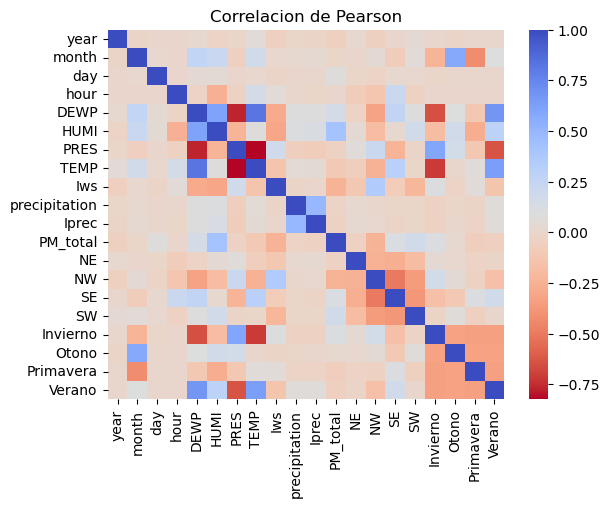

In [119]:
data.corr()
corr = data.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap='coolwarm_r').set(title='Correlacion de Pearson')

### Spearman

[Text(0.5, 1.0, 'Correlacion de Spearman')]

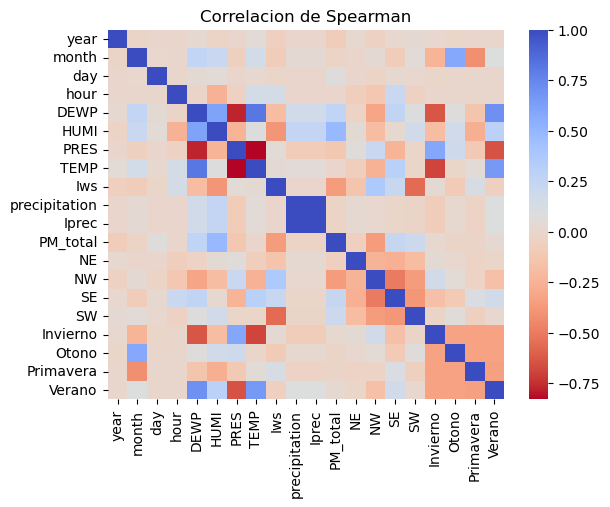

In [120]:
spear = data.corr('spearman')

# plot the heatmap
sns.heatmap(spear, 
        xticklabels=spear.columns,
        yticklabels=spear.columns, cmap='coolwarm_r').set(title='Correlacion de Spearman')

### Parcial

In [121]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import numpy as np

feature_num = data.shape[1]
feature_name = data.columns
partial_corr_matrix = np.zeros((feature_num, feature_num))
for i in range(feature_num):
    x1 = data.iloc[:, i]
    for j in range(feature_num):
        if i == j:
            partial_corr_matrix[i, j] = 1
        elif j < i:
            partial_corr_matrix[i, j] = partial_corr_matrix[j, i]
        else:
            x2 = data.iloc[:, j]
            df_control = data.drop(columns=[feature_name[i], feature_name[j]], axis=1)
            L = LinearRegression().fit(df_control, x1)
            Lx = L.predict(df_control)
            x1_prime = x1 - Lx
            
            L = LinearRegression().fit(df_control, x2)
            Lx = L.predict(df_control)
            x2_prime = x2 - Lx
            partial_corr_matrix[i, j] = pearsonr(x1_prime, x2_prime)[0]

<Axes: >

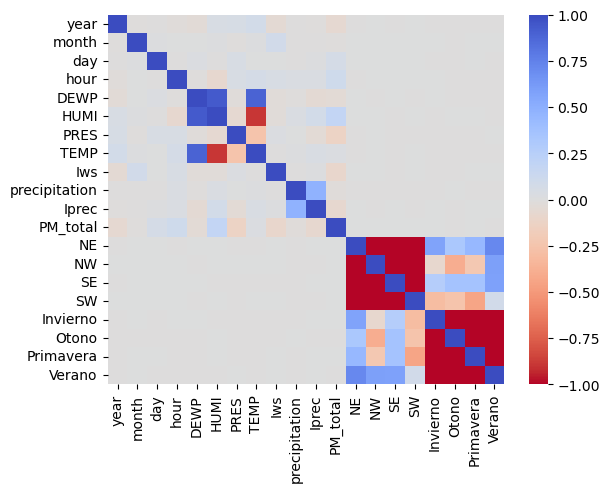

In [122]:
corrp = pd.DataFrame(partial_corr_matrix, columns=corr.columns)
sns.heatmap(corrp, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap='coolwarm_r')

## ACF y PACF

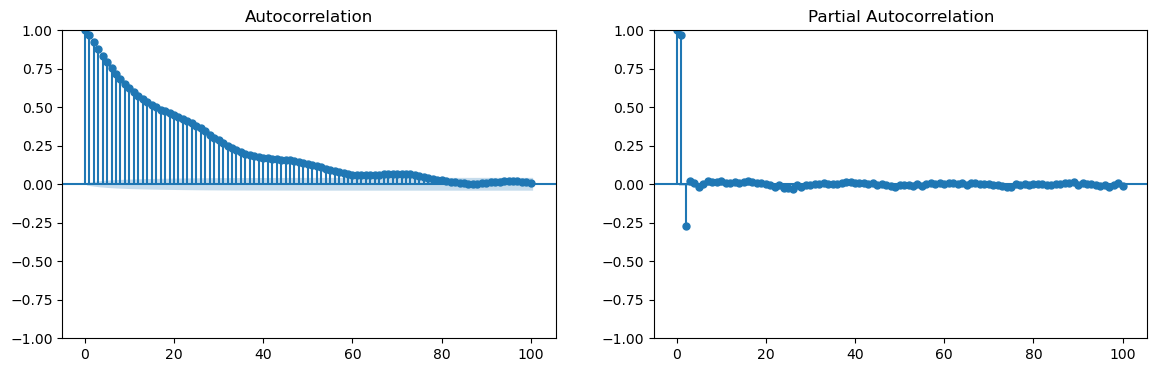

In [284]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(14,4))
plot_acf(data['PM_total'].tolist(), lags=100, ax=axes[0])
plot_pacf(data['PM_total'].tolist(), lags=100, ax=axes[1])
plt.show()

# Modelado

In [126]:
# Igual que la version anterior

In [127]:
var_salida = "PM_total"
data_x = data.drop(columns=[var_salida])
data_y = data[var_salida]

In [153]:
## Dividir en entrenamiento, validación y prueba
# Importar metodo para dividirlos
from sklearn.model_selection import train_test_split

# Fijare una semilla aleatorios para que sean reproducibles los conjuntos
semilla = 44

# Proporcion de datos en train, validation y test
train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

# Realizar la division en dos pasos (primero train y val/test, y luego val/test en validation y test)
x_train, x_val_test, y_train, y_val_test = train_test_split(data_x, data_y, test_size= validation_ratio + test_ratio, random_state = semilla)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state = semilla) 


In [154]:
data_x.head()

,year,month,day,hour,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,NE,NW,SE,SW,Invierno,Otono,Primavera,Verano
23,2010,1,1,23,-17.0,41.0,1020.0,-5.0,0.89,0.0,0.0,0,0,0,1,1,0,0,0
24,2010,1,2,0,-16.0,38.0,1020.0,-4.0,1.79,0.0,0.0,0,0,1,0,1,0,0,0
25,2010,1,2,1,-15.0,42.0,1020.0,-4.0,2.68,0.0,0.0,0,0,1,0,1,0,0,0
26,2010,1,2,2,-11.0,63.5,1021.0,-5.0,3.57,0.0,0.0,0,0,1,0,1,0,0,0
27,2010,1,2,3,-7.0,85.0,1022.0,-5.0,5.36,0.0,0.0,0,0,1,0,1,0,0,0


In [155]:
data_y.head()

23    129.0
24    148.0
25    159.0
26    181.0
27    138.0
Name: PM_total, dtype: float64

In [135]:
import itertools
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split


# Definir hiperparámetros
decision_tree_params = {'max_depth': [None, 2, 5, 10], 'min_samples_split': [2, 5, 10], 'splitter': ["best", "random"], 'min_samples_leaf': [1, 2, 3, 5]}
random_forest_params = {'n_estimators': [10, 50, 100, 150], 'max_depth': [None, 5, 10], 'min_samples_split': [5, 10], 'max_features': [0.1, 0.5, 0.7, 1.0]}
gradient_boosting_params = {'n_estimators': [10, 50, 100, 150], 'max_depth': [3, 5, 10], 'min_samples_split': [5, 10], 'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0]}



# Función para evaluar modelos con diferentes características
def evaluate_model(X_train, X_val, y_train, y_val, model_type='decision_tree'):
    best_model = None
    best_score = float('inf')
    
    if model_type == 'decision_tree':
        for depth in decision_tree_params['max_depth']:
            for min_samples_split in decision_tree_params['min_samples_split']:
                for splitter in decision_tree_params['splitter']:
                    for min_samples_leaf in decision_tree_params['min_samples_leaf']:
                        model = DecisionTreeRegressor(random_state=semilla, max_depth=depth, min_samples_split=min_samples_split, splitter=splitter, min_samples_leaf=min_samples_leaf)
                        model.fit(X_train, y_train)
                        y_pred = model.predict(X_val)
                        score = mean_absolute_error(y_val, y_pred)
                        if score < best_score:
                            best_score = score
                            best_model = model
    
    elif model_type == 'random_forest':
        for n_estimators in random_forest_params['n_estimators']:
            for depth in random_forest_params['max_depth']:
                for min_samples_split in random_forest_params['min_samples_split']:
                    for max_features in random_forest_params['max_features']:
                        model = RandomForestRegressor(random_state=semilla, n_estimators=n_estimators, max_depth=depth, min_samples_split=min_samples_split, max_features=max_features)
                        model.fit(X_train, y_train)
                        y_pred = model.predict(X_val)
                        score = mean_absolute_error(y_val, y_pred)
                        if score < best_score:
                            best_score = score
                            best_model = model
    
    elif model_type == 'gradient_boosting':
        for n_estimators in gradient_boosting_params['n_estimators']:
            for depth in gradient_boosting_params['max_depth']:
                for min_samples_split in gradient_boosting_params['min_samples_split']:
                    for learning_rate in gradient_boosting_params['learning_rate']:
                        model = GradientBoostingRegressor(random_state=semilla, n_estimators=n_estimators, max_depth=depth, min_samples_split=min_samples_split, learning_rate=learning_rate)
                        model.fit(X_train, y_train)
                        y_pred = model.predict(X_val)
                        score = mean_absolute_error(y_val, y_pred)
                        if score < best_score:
                            best_score = score
                            best_model = model

    return best_model, best_score

# Definir las tres categorías de características
feature_sets = {
    "all_features": data_x.columns,
    "humidity_and_wind": ["HUMI", "Iws", "NE", "NW", "SE", "SW"],
    "excluding_time": [col for col in data_x.columns if col not in ["year", "month", "day", "hour"]]
}

best_overall_model = None
best_overall_score = float('inf')
best_feature_set = None
best_model_type = None

# Evaluar los modelos para cada conjunto de características y tipo de modelo
model_types = ['decision_tree', 'random_forest', 'gradient_boosting']

for model_type in model_types:
    for feature_set_name, features in feature_sets.items():
        X_train_subset = x_train[features]
        X_val_subset = x_val[features]
        
        model, score = evaluate_model(X_train_subset, X_val_subset, y_train, y_val, model_type=model_type)
        
        print(f"Resultados para {feature_set_name} con {model_type}:")
        print("Mejor modelo:", model)
        print("MAE:", score)
        print()
        
        if score < best_overall_score:
            best_overall_score = score
            best_overall_model = model
            best_feature_set = feature_set_name
            best_model_type = model_type

print("Mejor conjunto de características:", best_feature_set)
print("Mejor tipo de modelo:", best_model_type)
print("Mejor modelo general:", best_overall_model)
print("MAE del mejor modelo general:", best_overall_score)

Resultados para all_features con decision_tree:
Mejor modelo: DecisionTreeRegressor(min_samples_leaf=2, random_state=44)
MAE: 31.037750629909276

Resultados para humidity_and_wind con decision_tree:
Mejor modelo: DecisionTreeRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=10,
                      random_state=44, splitter='random')
MAE: 51.93287696838869

Resultados para excluding_time con decision_tree:
Mejor modelo: DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=44)
MAE: 45.87941597659845

Resultados para all_features con random_forest:
Mejor modelo: RandomForestRegressor(min_samples_split=5, n_estimators=150, random_state=44)
MAE: 25.262971622498487

Resultados para humidity_and_wind con random_forest:
Mejor modelo: RandomForestRegressor(max_depth=10, max_features=0.7, min_samples_split=5,
                      n_estimators=150, random_state=44)
MAE: 51.29289780509519

Resultados para excluding_time con random_forest:
Mejor modelo: RandomForest

In [162]:
# Seleccionamos los mejores 2 modelos y los testeamos con los datos de test
x_train_val = pd.concat([x_train, x_val])
y_train_val = pd.concat([y_train, y_val])

gb = GradientBoostingRegressor(learning_rate=0.2, max_depth=10, min_samples_split=5,\
                          n_estimators=150, random_state=44)
rf = RandomForestRegressor(min_samples_split=5, n_estimators=150, random_state=44)

gb.fit(x_train_val, y_train_val)
gb_pred = gb.predict(x_test)

rf.fit(x_train_val, y_train_val)
rf_pred = rf.predict(x_test)

In [169]:
print(f"MAE gb :{mean_absolute_error(y_test, gb_pred)}")
print(f"MAE rf :{mean_absolute_error(y_test, rf_pred)}")

MAE gb :21.701167937853096
MAE rf :22.81882179781237


In [218]:
print(f"MSE gb :{mean_squared_error(y_test, gb_pred)}")
print(f"MSE rf :{mean_squared_error(y_test, rf_pred)}")

MSE gb :1187.777372732722
MSE rf :1419.1416507392926


In [240]:
print(f"MAPE gb: {mean_absolute_percentage_error(y_test, gb_pred)}")
print(f"MAPE rf: {mean_absolute_percentage_error(y_test, rf_pred)}")

MAPE gb: 0.42389974761917215
MAPE rf: 0.4781254632207544


### No se observa overfitting

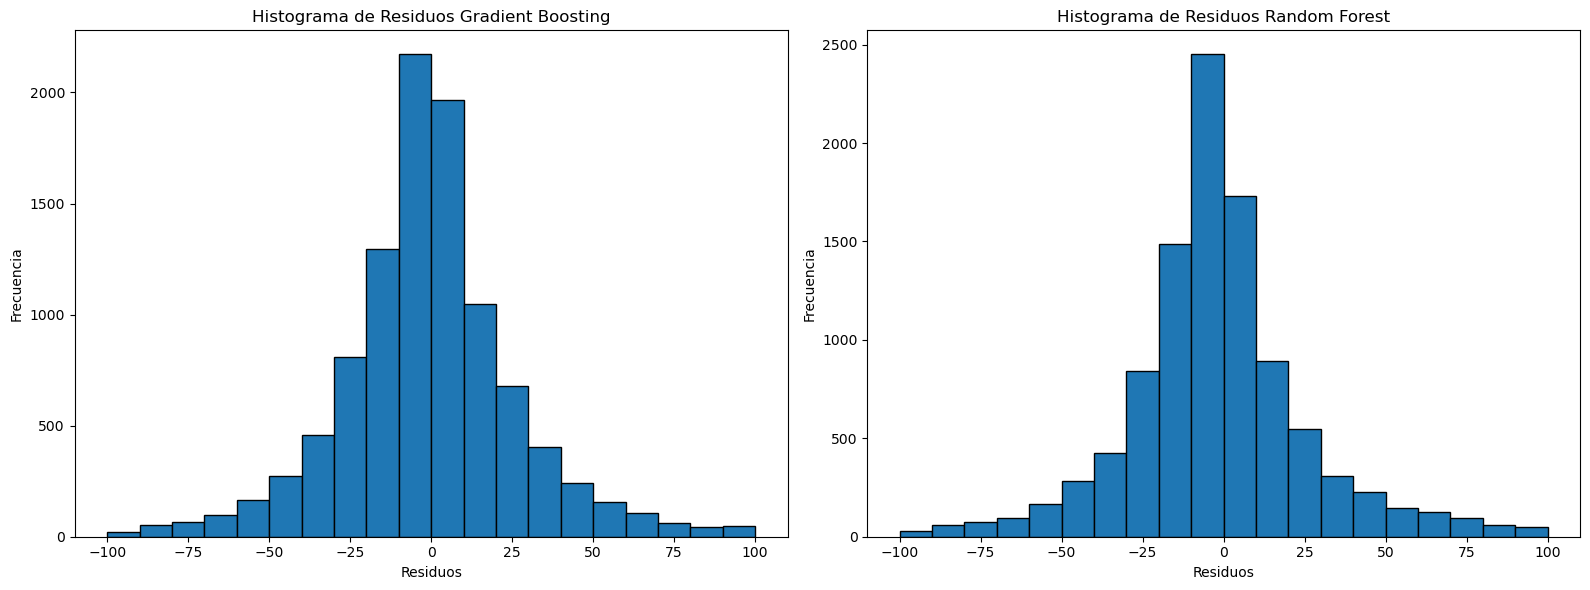

In [196]:
# Grafica 1
residuos_gb = y_test - gb_pred
# Grafica 2
residuos_rf = y_test - rf_pred

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].hist(residuos_gb, bins=20, range=(-100, 100), edgecolor='black')
axes[0].set_xlabel('Residuos')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Histograma de Residuos Gradient Boosting')

axes[1].hist(residuos_rf, bins=20, range=(-100, 100), edgecolor='black')
axes[1].set_xlabel('Residuos')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Histograma de Residuos Random Forest')

plt.tight_layout()
plt.show()


In [197]:
from scipy import stats

_, p_gb = stats.normaltest(residuos_gb)
_, p_rf = stats.normaltest(residuos_rf)

print(f"Valor p para GB: {p_gb}")
print(f"Valor p para RF: {p_rf}")
# No son distribuciones normales

Valor p para GB: 0.0
Valor p para RF: 0.0


In [205]:
# Veamos las medias
print(f"Media de GB: {np.mean(residuos_gb)}")
print(f"Media de RF: {np.mean(residuos_rf)}")

Media de GB: -0.36169213100914505
Media de RF: -1.2708803776330413


El gradient boosting pareceria tener una media más cercana a 0, lo cual es lo deseado

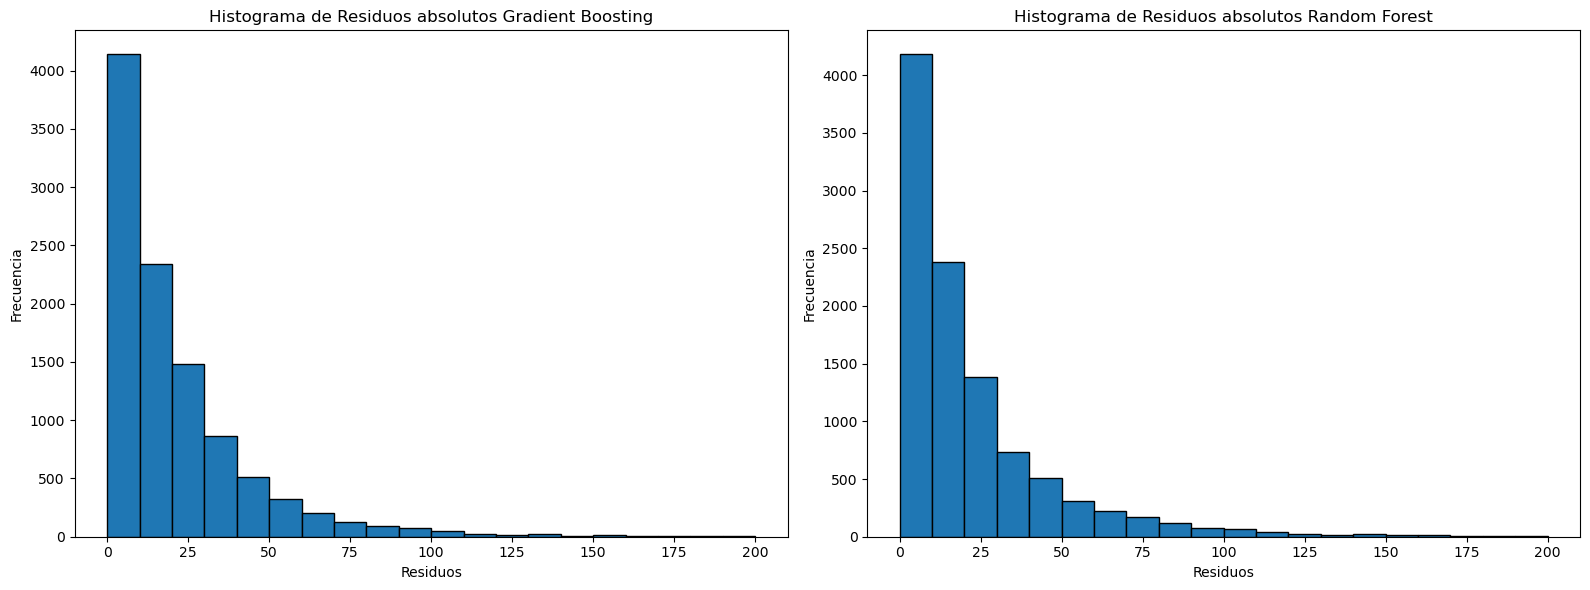

In [235]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].hist(residuos_abs_gb, bins=20, range=(0, 200), edgecolor='black')
axes[0].set_xlabel('Residuos')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Histograma de Residuos absolutos Gradient Boosting')

axes[1].hist(residuos_abs_rf, bins=20, range=(0, 200), edgecolor='black')
axes[1].set_xlabel('Residuos')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Histograma de Residuos absolutos Random Forest')

plt.tight_layout()
plt.show()

In [206]:
# Comparando gb y rf
from scipy import stats
stats.wilcoxon(x=residuos_gb, y=residuos_rf, alternative='greater')

WilcoxonResult(statistic=29700564.0, pvalue=3.440084311926285e-22)

El gb si tiene una media más cercana a 0 que el rf

In [219]:
# Residuos absolutos
residuos_abs_gb = abs(y_test - gb_pred)
residuos_abs_rf = abs(y_test - rf_pred)

In [226]:
# Residuos al cuadrado
residuos_sqrt_gb = (y_test - gb_pred)**2
residuos_sqrt_rf = (y_test - rf_pred)**2

In [241]:
# Residuos procentuales (MAPE)
residuos_por_gb = 100 * abs(y_test - gb_pred) / abs(y_test)
residuos_por_rf = 100 * abs(y_test - rf_pred) / abs(y_test)

In [228]:
#Comparando errores absolutos
stats.mannwhitneyu(residuos_abs_gb, residuos_abs_rf, alternative='two-sided')

MannwhitneyuResult(statistic=53735707.0, pvalue=0.6672207294713319)

In [232]:
#Comparando errores al cuadrado
stats.mannwhitneyu(residuos_sqrt_gb, residuos_sqrt_rf, alternative='two-sided')

MannwhitneyuResult(statistic=53735707.0, pvalue=0.6672207294713319)

Aún así, el test de Mann–Whitney U nos dice que la diferencia entre las dos distribuciones de errores absolutos no es estadisticamente significante, y obtenemos el mismo resultado para los errores al cuadrado. Por lo que no podemos afirmar con certeza que gb sea el mejor modelo. De todas formas lo elegiremos ya que presenta el MAE y el MSE más pequeño.

Procedemos a calcular los intervalo de confianza para el gb mediante bootstrap:

In [251]:
# Bootstrap MAE
x = residuos_abs_gb
sample_mean = []
n=len(x)
for i in range(100000):
  y = np.random.choice(x.tolist(), n) ### esta es cada una de las muestras bootstrap, muestra aleatoria con repetición
  avg = np.mean(y) # la media de cada muestra
  sample_mean.append(avg)

In [252]:
print('MAE 95%')
print('MAE de la muestra original: ' +str(np.mean(x)))

print('Intervalo de confianza inferior: '+str(np.percentile(sample_mean, 2.5)))
print('Intervalo de confianza superior: '+str(np.percentile(sample_mean, 97.5)))

MAE 95%
MAE de la muestra original: 21.701167937853096
Intervalo de confianza inferior: 21.19259355604041
Intervalo de confianza superior: 22.224286089732534


In [253]:
# Bootstrap MSE
x = residuos_sqrt_gb
sample_mean = []
n=len(x)
for i in range(500000):
  y = np.random.choice(x.tolist(), n) ### esta es cada una de las muestras bootstrap, muestra aleatoria con repetición
  avg = np.mean(y) # la media de cada muestra
  sample_mean.append(avg)

In [254]:
print('MSE 95%')
print('MSE de la muestra original: ' +str(np.mean(x)))

print('Intervalo de confianza inferior: '+str(np.percentile(sample_mean, 2.5)))
print('Intervalo de confianza superior: '+str(np.percentile(sample_mean, 97.5)))

MSE 95%
MSE de la muestra original: 1187.777372732722
Intervalo de confianza inferior: 1084.746881157441
Intervalo de confianza superior: 1309.2420501584775


In [265]:
# Bootstrap MAPE
x = residuos_por_gb
sample_mean = []
n=len(x)
for i in range(500000):
  y = np.random.choice(x.tolist(), n) ### esta es cada una de las muestras bootstrap, muestra aleatoria con repetición
  avg = np.mean(y) # la media de cada muestra
  sample_mean.append(avg)

In [266]:
print('MAPE 95%')
print('MAPE de la muestra original: ' +str(np.mean(x)))

print('Intervalo de confianza inferior: '+str(np.percentile(sample_mean, 2.5)))
print('Intervalo de confianza superior: '+str(np.percentile(sample_mean, 97.5)))

MAPE 95%
MAPE de la muestra original: 42.38997476191722
Intervalo de confianza inferior: 40.86513960732866
Intervalo de confianza superior: 43.98934666646418


## Comparandolo con la media

In [273]:
media = np.mean(y_train_val)
residuos_abs_media = abs(y_test - media)
media

94.87805388302547

In [258]:
#MAE de la media
np.mean(residuos_abs_media)

66.48640615860825

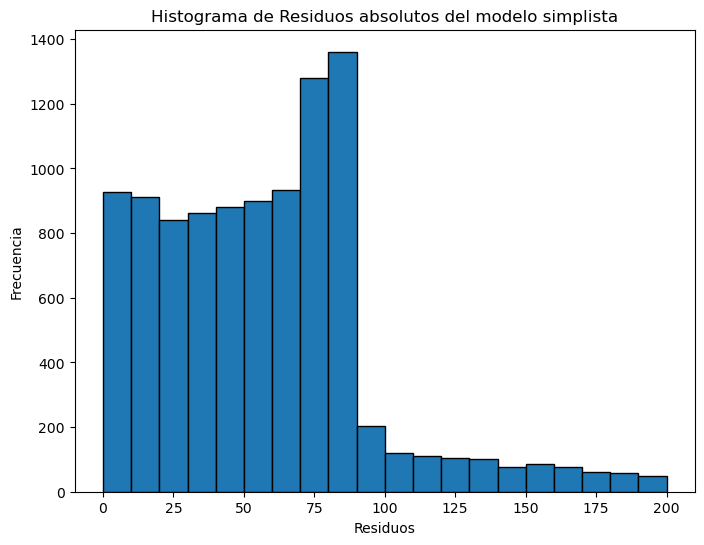

In [272]:
plt.figure(figsize=(8, 6))
plt.hist(residuos_abs_media, bins=20, range=(0, 200), edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos absolutos del modelo simplista')
plt.show()

In [267]:
# Comparacion de gb con el modelo de la media
_, p = stats.mannwhitneyu(residuos_abs_gb, residuos_abs_media, alternative='less')
print(repr(p))

0.0


El modelo gb es claramente presenta una distribucion de errores absolutos inferior, y por ende mejor, que un modelo que solo use la media

### Valores SHAP

In [ ]:
#!pip install shap

IndexError: list index out of range

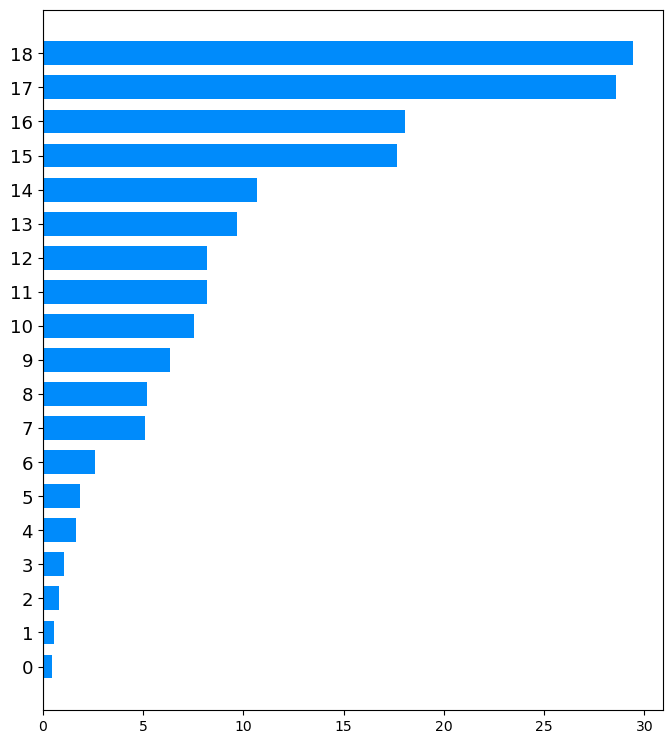

In [275]:

import shap

# Crear objeto explainer (explicador) de SHAP, con el gradient boosting usado anteriormente
explainer = shap.Explainer(gb)
# Calcular todos los valores de SHAP para nuestras entradas
shap_values = explainer(data_x)


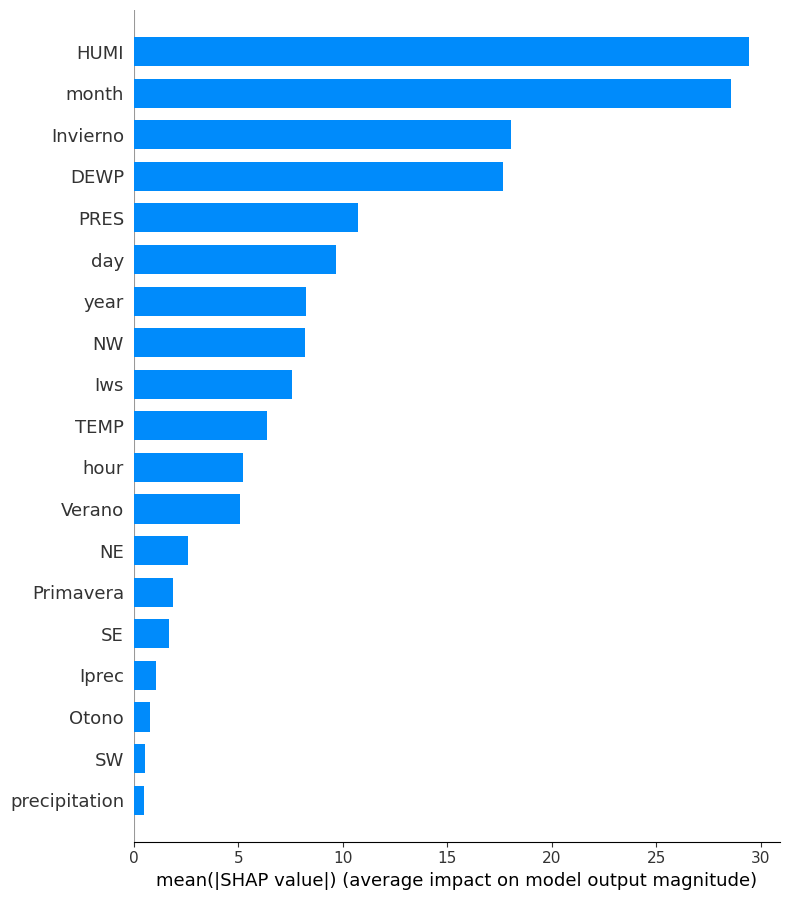

In [276]:
shap.summary_plot(shap_values, data_x, feature_names=data_x.columns, plot_type="bar")

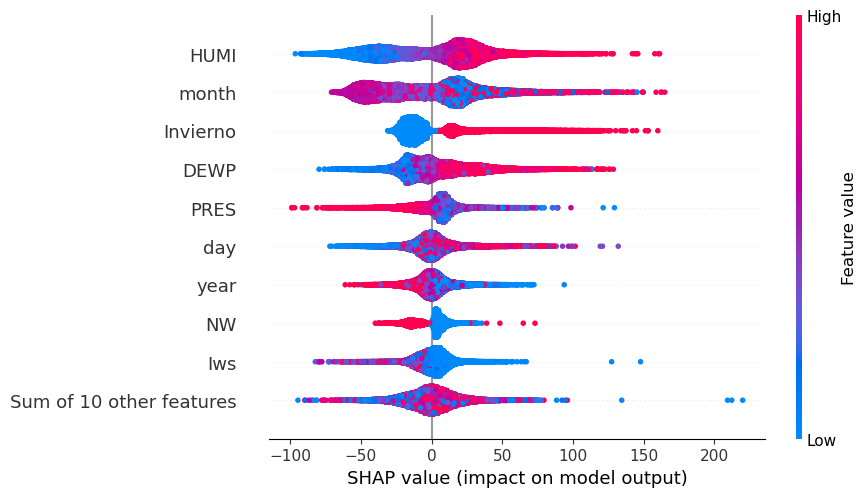

In [277]:
shap.plots.beeswarm(shap_values)

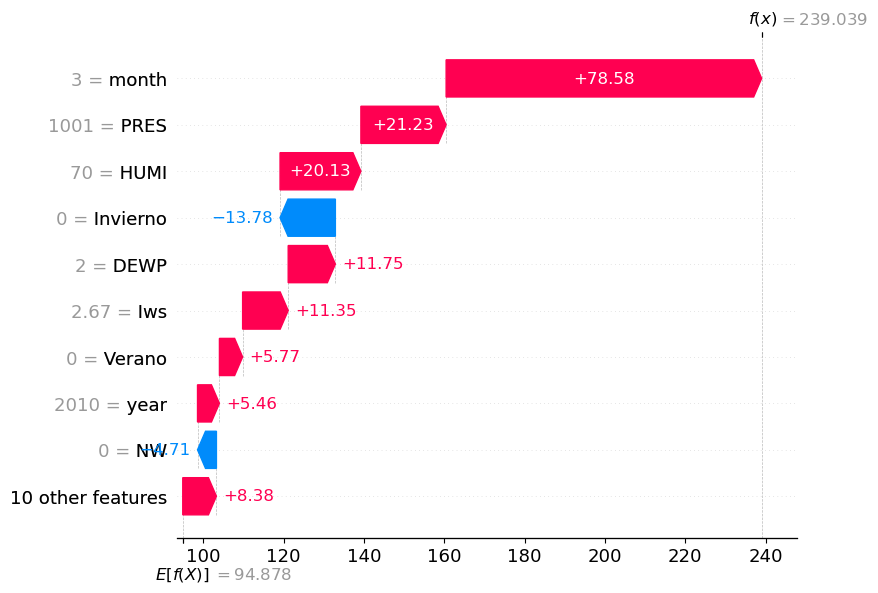

In [281]:
shap.plots.waterfall(shap_values[1843])

# Guardar el modelo

In [283]:
modelo_guardar = gb.fit(data_x, data_y)

# Guardar el modelo en un pickle
import pickle as pk
pk.dump(modelo_guardar, open("modelo_final_escogido.pickle", 'wb'))